# 딥러닝 프로젝트
: 이제까지 배운 내용으로 3가지 데이터를 이용해 딥러닝 모델을 만들어본다.

# 순서
- Boston 주택 가격 예측 모델 만들기
- Reuters 주제 분류 모델 만들기
- CIFAR10 이미지 분류 모델 만들기

# Boston 주택 가격 예측 모델 만들기
---
- 보스턴 시의 주택가격 데이터셋을 이용해 주택가격을 예측하는 회귀모델을 만들어본다.
- 13개의 피처와 가격을 나타내는 타겟변수가 존재한다.
- 하지만, 딥러닝 모델링을 하는데 집중하므로, 변수간의 스케일을 맞추는 것 이외에 전처리는 하지 않을 예정이다.
- 따라서 피처들에 대한 설명은 생략한다.


## 데이터 로드 및 전처리
---
- `keras.datasets`에서 보스턴 시의 주택가격 데이터를 불러온다.
- 훈련데이터와 테스트데이터로 불러온 다음, 훈련데이터의 20%를 검증데이터로 사용한다.
- 피처들마다 스케일의 차이가 있으므로, 표준화해준다.

In [ ]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

In [ ]:
# 훈련데이터와 테스트데이터 불러오기
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 훈련데이터의 20%를 검증데이터로 분리하기
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.2,
                                                  random_state=42)

# 데이터셋의 크기 확인
print(len(x_train))
print(len(x_val))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
323
81
102


In [ ]:
# 훈련데이터의 평균과 표준편차
mean, std = x_train.mean(axis=0), x_train.std(axis=0)

# 데이터셋의 피처들을 표준화
x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (test_data - mean) / std

print(x_train[0])
print(x_val[0])
print(x_test[0])

[ 0.29370706 -0.51065998  1.06364917  3.61157559  0.64380411  0.55183287
  1.01341088 -1.18750033  1.690359    1.575355    0.83088514  0.22804961
 -1.20047588]
[-0.43279953 -0.51065998 -0.57110626 -0.27688746 -0.90387393 -0.82693055
 -1.24395037  0.65277128 -0.73521855 -1.01399245 -0.2060115   0.45290921
 -0.32346532]
[ 1.93400983 -0.51065998  1.06364917 -0.27688746  1.04975245  0.20886375
  1.12807049 -0.95253229  1.690359    1.575355    0.83088514 -3.400561
  2.22636169]


-  훈련데이터, 검증데이터 그리고 테스트데이터가 모두 표준화되었음을 알 수 있다.

## 모델 구성 및 컴파일
---
- 주택가격 예측을 위한 딥러닝모델을 구성하고 컴파일한다.
- 모델은 `Sequential()`을 이용하여 만든다.
- 13개의 피처가 존재하므로, `Input`레이어에 13개의 유닛이 들어간다(이는 `x_train.shape[1]`과 같음).
- 회귀모델이므로 1개의 예측값을 내보내므로 `Output`레이어는 1개의 유닛을 갖는다.
- 은닉층에 2개의 `Dense`를 사용했으며 각 레이어에는 64개의 유닛이 들어갔고, 활성화함수는 `relu`함수를 사용했고, 안정적인 MAE성능이 나오기 위해 각 층에서 L2규제를 사용했다.



In [ ]:
# 모델 구성
tf.random.set_seed(42)
b_model = models.Sequential()
b_model.add(layers.Input((x_train.shape[1], ), name='b_input'))
b_model.add(layers.Dense(64, activation='relu', name='b_hidden1', kernel_regularizer='l2'))
b_model.add(layers.Dense(64, activation='relu', name='b_hidden2', kernel_regularizer='l2'))
b_model.add(layers.Dense(1, name='b_output'))
b_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ b_hidden1 (Dense)                    │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ b_hidden2 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ b_output (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

- 모델을 컴파일 할 때는 회귀모델이므로 loss를 mse, metrics를 mae로 한다.

In [ ]:
# 모델 컴파일
b_model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

## 모델 학습
---
- 예측을 위한 모델을 학습한다.
- 모델의 크기가 크지 않고 층이 깊지 않으므로  `epochs`는 100, `batch_size`는 64로 기존보다 크게 설정했다.

In [ ]:
# 모델 학습
b_model_history = b_model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    batch_size=64, verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 643.6777 - mae: 23.3676 - val_loss: 462.3490 - val_mae: 20.1726
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 615.7518 - mae: 22.7867 - val_loss: 440.4293 - val_mae: 19.6221
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 588.7196 - mae: 22.2058 - val_loss: 417.8872 - val_mae: 19.0312
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 560.8077 - mae: 21.5795 - val_loss: 393.5263 - val_mae: 18.3592
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 530.4704 - mae: 20.8623 - val_loss: 366.2619 - val_mae: 17.5668
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 496.0620 - mae: 20.0243 - val_loss: 335.5175 - val_mae: 16.6302
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 456.3863 - mae: 19.0346 - val_loss: 301.3208 - val_mae: 15.6428
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 410.8919 - mae: 17.8474 - val_loss: 263.9751 - val_mae: 14.4889
Epoch 9/100
6/6 ━━━━━━━━━━━━━━

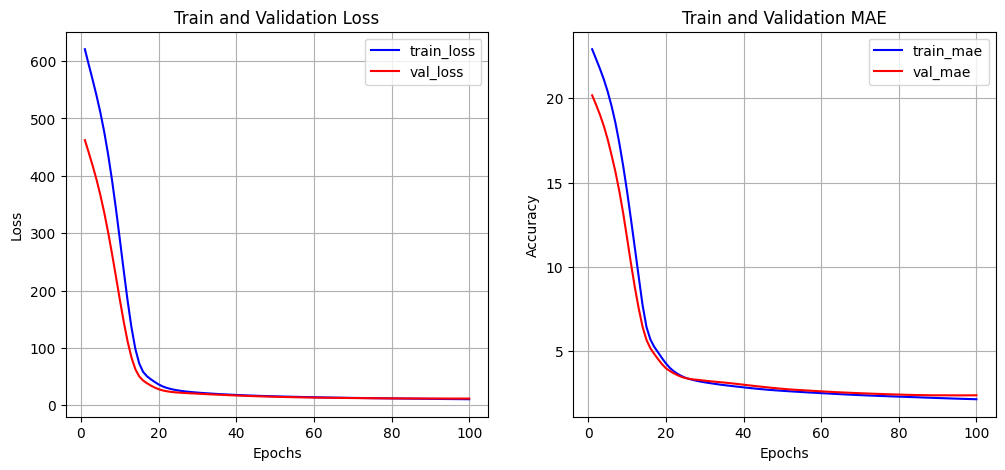

In [ ]:
# 모델 학습과정 시각화
b_model_history_dict = b_model_history.history

loss = b_model_history_dict['loss']
val_loss = b_model_history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = b_model_history_dict['mae']
val_mae = b_model_history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 왼쪽그래프를 통해 모델이 과적합이 발생하지 않고 학습이 잘 이루어졌음을 알 수 있다.
- 오른쪽 그래프에서도 epoch이 커질수록 mae값이 낮아진다. 지속적인 성능향상을 보였음을 알 수 있다.

## 모델 평가 및 예측
---
- 테스트 데이터를 가져와 모델 성능을 평가한다.

In [ ]:
# 모델 성능 평가
b_model.evaluate(x_test, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 18.0571 - mae: 2.8925


[23.93694496154785, 3.110309600830078]

- 검증데이터와 크게 차이나지 않은 값이 나왔음을 알 수 있다.

# Reuters 주제 분류 모델 만들기
---
-  Reuters 뉴스 텍스트 데이터를 이용해 46가지의 주제 중 알맞은 주제로 분류하는 모델을 만들어본다.

## 데이터 로드 및 전처리
---
- `keras.dataset`에서 reuters 데이터셋을 불러온다. 이 때, 불러오는 단어의 개수는 10000개로 한다.
- 불러온 훈련데이터의 25%는 검증 데이터셋으로 분리해준다.
- 일반적으로 자주 사용되는 원핫인코딩을 이용하여 텍스트를 0과 1의 벡터로 변환한다.
- 뉴스 주제인 레이블도 원핫인코딩을 이용해 변환을 수행한다.

In [ ]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from tensorflow.keras.initializers import GlorotUniform, Zeros, HeUniform

In [ ]:
# reuters 데이터 불러오기
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25, random_state=42)


# 데이터셋의 크기 확인
print(len(x_train))
print(len(x_val))
print(len(test_data))
# 레이블 개수 확인
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원핫인코딩을 수행한다.
- 레이블 데이터(타겟 데이터)는 `utils.to_categorical()`를 사용해 벡터형태로 만들어준다.

In [ ]:
# 텍스트 데이터에 원핫인코딩 수행
# 10000개의 단어만 불러왔으므로 차원은 10000
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

In [ ]:
# 레이블 데이터를 범주형으로 변환
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6736, 46)
(2246, 46)
(2246, 46)


## 모델 학습 구성 및 컴파일
---
- `BatchNormalization`과 `Dropout`을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.
- `Dropout`에 과적합을 줄이는데에 한계가 있어, `l2`규제를 추가한다.
- 활성화함수는 `elu`, `relu`, `LeakyReLU`를 사용했다. `LeakyReLU`에서 `negative_slope`은 입력이 음수일 때 기울기이다.
- 원핫인코딩이 된 레이블을 사용하므로 모델 컴파일에서 loss로 `categorical_crossentropy`을 사용한다.
- 이 외에도 각 층에 He 균일분포로 가중치 초기화를 해주었다.

In [ ]:
# 딥러닝 모델 구성
r_model = models.Sequential()
r_model.add(layers.Dense(256, input_shape=(10000, ), name='r_input'))
r_model.add(layers.BatchNormalization())
r_model.add(layers.Activation('elu'))
r_model.add(layers.Dropout(0.4))
r_model.add(layers.Dense(128, name='r_hidden1', kernel_initializer=HeUniform(),bias_initializer=Zeros(), kernel_regularizer='l2'))
r_model.add(layers.BatchNormalization())
r_model.add(layers.Activation('relu'))
r_model.add(layers.Dropout(0.4))
r_model.add(layers.Dense(128,name='r_hidden2', kernel_initializer=HeUniform(),bias_initializer=Zeros(), kernel_regularizer='l2'))
r_model.add(layers.BatchNormalization())
r_model.add(layers.LeakyReLU(negative_slope=0.1))
r_model.add(layers.Dropout(0.4))
r_model.add(layers.Dense(64, name='r_hidden3', kernel_initializer=HeUniform(),bias_initializer=Zeros(), kernel_regularizer='l2'))
r_model.add(layers.BatchNormalization())
r_model.add(layers.Activation('relu'))
r_model.add(layers.Dropout(0.4))
r_model.add(layers.Dense(46, activation='softmax', name='r_output'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
r_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ r_input (Dense)                      │ (None, 256)                 │       2,560,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r_hidden1 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r_hidden2 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r_hidden3 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ r_output (Dense)                     │ (None, 46)                  │           2,990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,623,214 (10.01 MB)

 Trainable params: 2,622,062 (10.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
# 모델 컴파일
r_model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

## 모델 학습
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.
- `early_stopping`을 적용하므로 `epochs`는 이전모델보다 작게 적용한다.


In [ ]:
# 콜백함수 적용
check_point_cb = callbacks.ModelCheckpoint('reuters.keras',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=20,
                                            monitor='val_loss',
                                            restore_best_weights=True)

In [ ]:
# 모델 학습
r_history = r_model.fit(x_train, y_train,
                        epochs=80, batch_size=128,
                        validation_data=(x_val, y_val),
                        callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.1717 - loss: 9.5352 - val_accuracy: 0.6247 - val_loss: 7.2525
Epoch 2/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6064 - loss: 6.0876 - val_accuracy: 0.6563 - val_loss: 5.2778
Epoch 3/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6847 - loss: 4.2500 - val_accuracy: 0.6509 - val_loss: 3.9097
Epoch 4/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7255 - loss: 3.0670 - val_accuracy: 0.6443 - val_loss: 3.0820
Epoch 5/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7535 - loss: 2.2859 - val_accuracy: 0.6367 - val_loss: 2.5378
Epoch 6/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7746 - loss: 1.7678 - val_accuracy: 0.6714 - val_loss: 2.1327
Epoch 7/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8024 - loss: 1.4221 - val_accuracy: 0.6750 - val_loss: 1.8594
Epoch 8/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8231 - loss: 1.2040 - val_accuracy: 0.7222 - 

- 모델 학습 과정을 시각화한다.

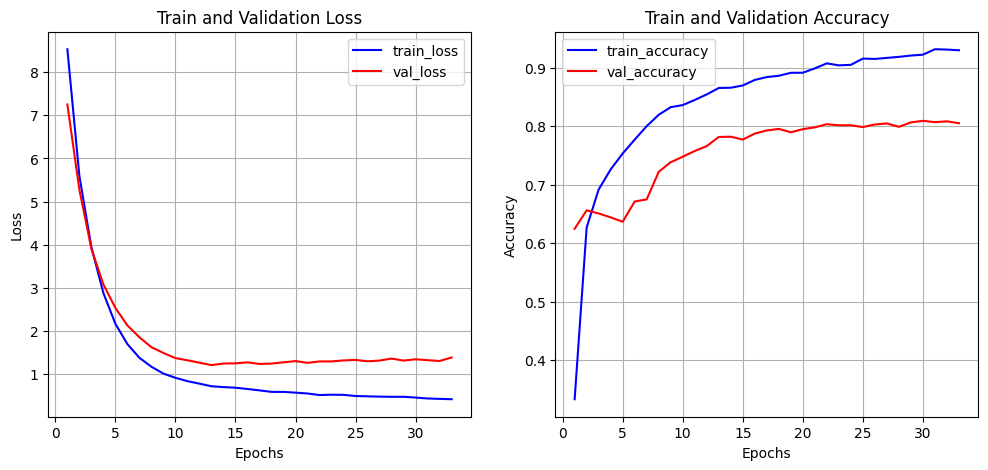

In [ ]:
# 모델 학습 과정 시각화
r_history_dict = r_history.history

loss = r_history_dict['loss']
val_loss = r_history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = r_history_dict['accuracy']
val_accuracy = r_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 왼쪽 그래프에서 드롭 아웃과 L2규제가 적용되어 과적합이 어느정도 방지되었음을 알 수 있다.
- 오른쪽 그래프에서 훈련데이터의 정확도와 성능차가 점점 커지려고 하는 형태를 보인다. 검증데이터의 정확도는 0.8정도의 정확도를 가지며 파라미터 조절을 했을 때도 비슷하게 나왔다.

## 모델 평가 및 예측
---
- 테스트 데이터셋을 이용해 모델을 평가한다.

In [ ]:
r_model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7652 - loss: 1.2715


[1.3147813081741333, 0.7537844777107239]

# CIFAR10 이미지 분류 모델 만들기

## 데이터 로드 및 전처리
---
- `keras.dataset`에서 CIFAR10 데이터셋을 불러온다.
- 불러온 훈련데이터에서 20%를 검증 데이터셋으로 분리한다.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# CIFAR10데이터 불러오기
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련데이터에서 검증데이터를 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담아준다.

In [ ]:
# 이미지 레이블을 리스트로 저장
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

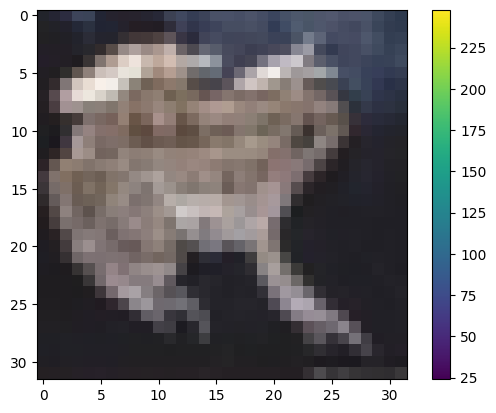

In [ ]:
# 시각화해서 잘 불러왔는지 확인
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태 출력
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 32X32X3인 3072로 변경해 모델에서 사용할 수 있게 평탄화해준다.

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태 변경
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


- 스케일의 차이를 줄여주기 위해 0~1의 범위로 정규화시켜준다.

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하는 딥러닝 (분류)모델을 만들어준다.

In [ ]:
c_model = models.Sequential()
c_model.add(layers.Input(shape=(3072, )))
c_model.add(layers.Dense(1024))
c_model.add(layers.BatchNormalization())
c_model.add(layers.Activation('relu'))
c_model.add(layers.Dropout(0.2))
c_model.add(layers.Dense(512))
c_model.add(layers.BatchNormalization())
c_model.add(layers.Activation('relu'))
c_model.add(layers.Dropout(0.3))
c_model.add(layers.Dense(256))
c_model.add(layers.BatchNormalization())
c_model.add(layers.Activation('relu'))
c_model.add(layers.Dropout(0.2))
c_model.add(layers.Dense(10, activation='softmax'))

c_model.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
c_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,812,618 (14.54 MB)

 Trainable params: 3,809,034 (14.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

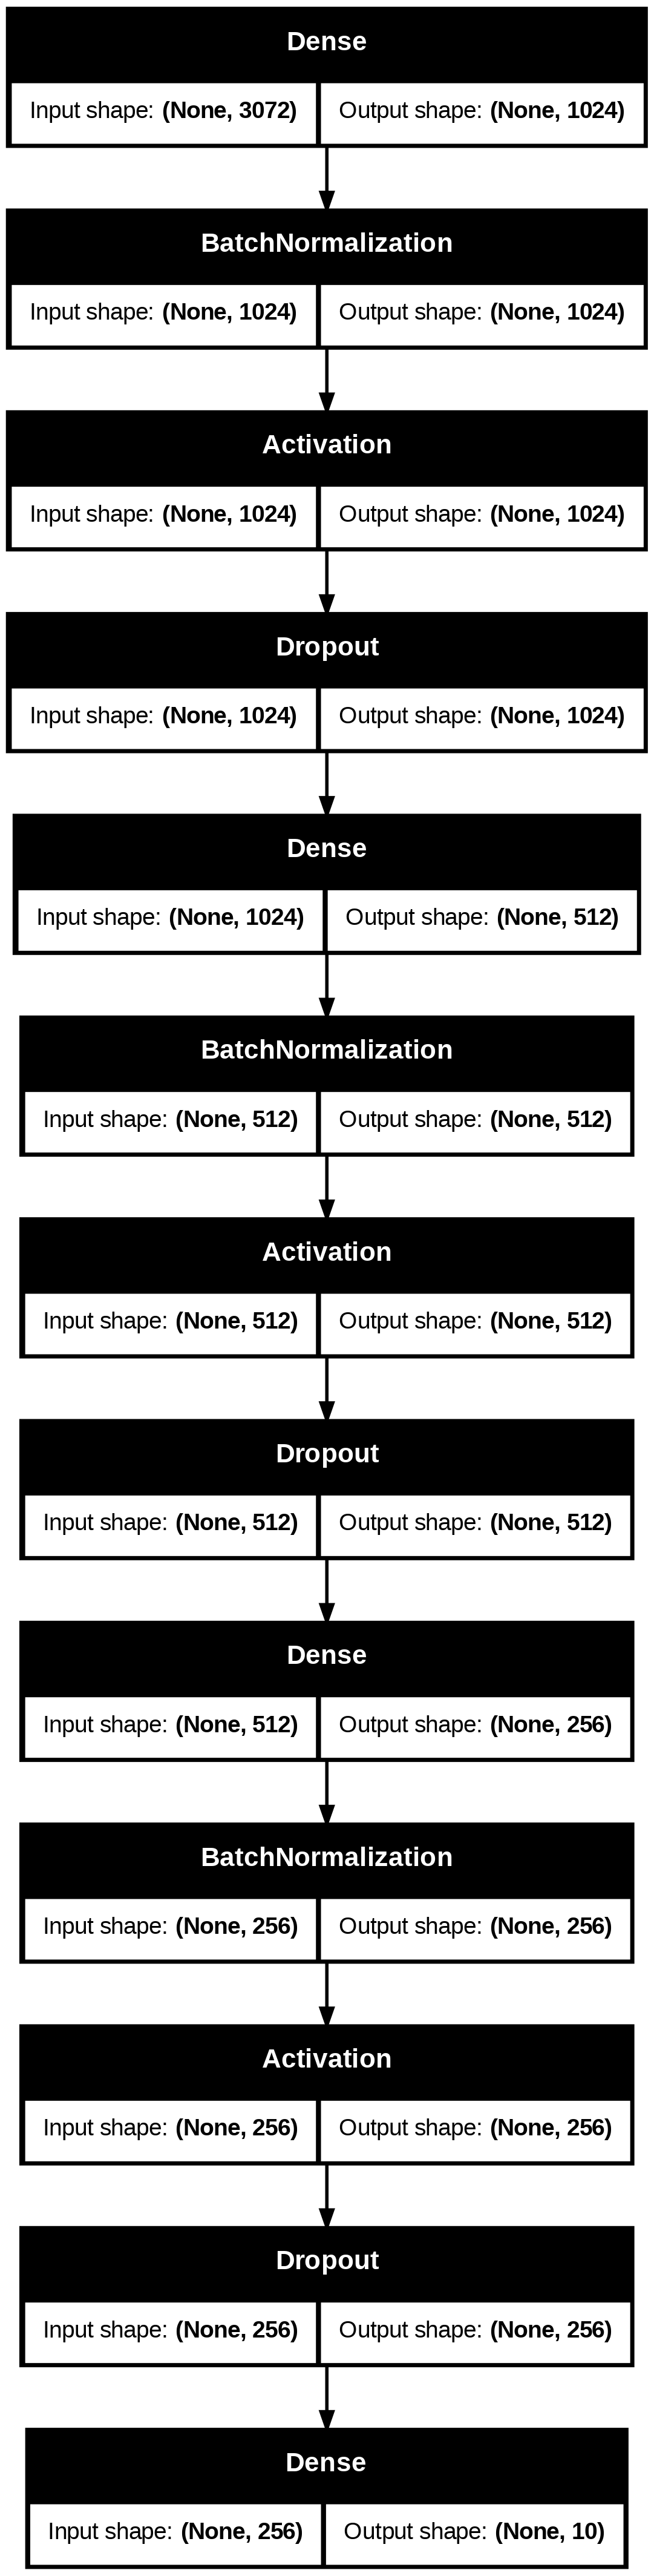

In [ ]:
utils.plot_model(c_model, show_shapes=True)

## 모델 학습
---
- 이전에 다룬 모델과 마찬가지로, ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행한다.

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('cifar10.keras',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

In [ ]:
# 모델 학습
c_history = c_model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.3165 - loss: 1.9531 - val_accuracy: 0.2944 - val_loss: 1.9299
Epoch 2/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4343 - loss: 1.5715 - val_accuracy: 0.3945 - val_loss: 1.6774
Epoch 3/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4818 - loss: 1.4483 - val_accuracy: 0.3759 - val_loss: 1.7178
Epoch 4/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5088 - loss: 1.3622 - val_accuracy: 0.4170 - val_loss: 1.6461
Epoch 5/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5359 - loss: 1.2961 - val_accuracy: 0.4223 - val_loss: 1.6229
Epoch 6/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5566 - loss: 1.2426 - val_accuracy: 0.4382 - val_loss: 1.5928
Epoch 7/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5720 - loss: 1.1891 - val_accuracy: 0.4430 - val_loss: 1.5462
Epoch 8/60
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5945 - loss: 1.1359 - val_accuracy: 

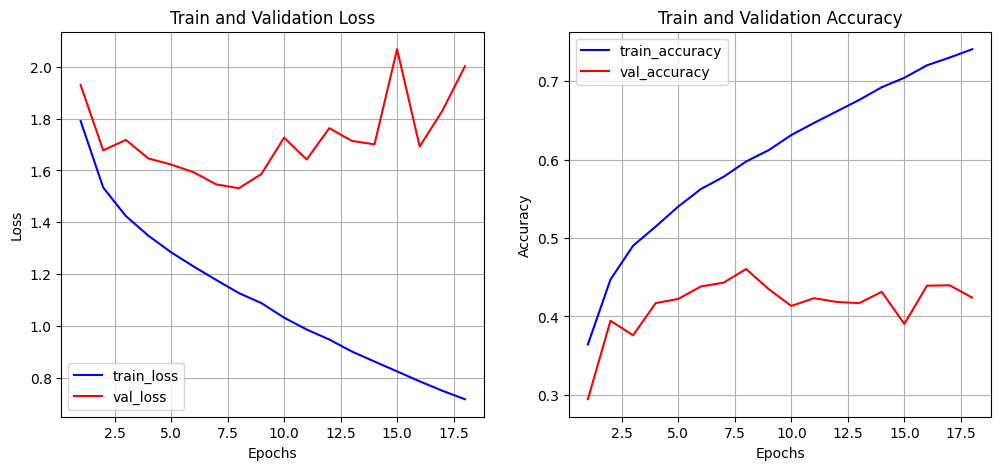

In [ ]:
# 모델 학습과정 시각화
c_history_dict = c_history.history

loss = c_history_dict['loss']
val_loss = c_history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = c_history_dict['accuracy']
val_accuracy = c_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

- 학습이 제대로 이루어지지 않았고, 성능도 0.5이하로 좋지 않게 나옴을 알 수 있다.

## 모델 평가 및 예측
---
- 테스트 데이터셋을 이용해 모델을 평가한다.

In [ ]:
c_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4606 - loss: 1.5292


[1.5286002159118652, 0.4609000086784363]

- 지금까지 배운 Dense Layer만 활용해서는 높은 성능을 얻기 어려우므로, 이미지 데이터를 다루기에 적합한 CNN(Convolution Neural Network)계열을 모델을 사용해야 한다.